# Bisection Method

In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from math import log2, ceil

In [2]:
plt.rcParams.update({'lines.linewidth': 2, 'lines.markersize': 6,
                     'xtick.labelsize': 12, 'ytick.labelsize': 12,
                     'axes.labelsize': 14, 'legend.fontsize': 12,
                     'axes.titlesize': 12})

In [3]:
def bisection(f, a, b, n_max, tol, verbose=True):
    converged = False
    p = 0
    for i in range(1, n_max+1):
        p = 0.5 * (a + b)
        if verbose:
            print(f" {i:3d}: a = {a:.8f}, b = {b:.8f}, p = {p:.8f}, f(p) = {f(p):g}")

        if f(a) * f(p) <= 0:
            b = p
        else:
            a = p

        if abs(f(p)) == 0:
            converged = True
            break

        if i > 1 and 0.5 * (b - a) < tol:
            converged = True
            break

    if not converged:
        print(f"ERROR: Did not converge after {n_max} iterations")

    return p

## Example 1
Find a root of $x^3 + 4x^2 - 10$ in $[1,2]$.

In [4]:
f = lambda x: x**3 + 4 * x**2 - 10
a = 1
b = 2
n_max = 100
tol = 1e-8

bisection(f, a, b, n_max, tol)

   1: a = 1.00000000, b = 2.00000000, p = 1.50000000, f(p) = 2.375
   2: a = 1.00000000, b = 1.50000000, p = 1.25000000, f(p) = -1.79688
   3: a = 1.25000000, b = 1.50000000, p = 1.37500000, f(p) = 0.162109
   4: a = 1.25000000, b = 1.37500000, p = 1.31250000, f(p) = -0.848389
   5: a = 1.31250000, b = 1.37500000, p = 1.34375000, f(p) = -0.350983
   6: a = 1.34375000, b = 1.37500000, p = 1.35937500, f(p) = -0.0964088
   7: a = 1.35937500, b = 1.37500000, p = 1.36718750, f(p) = 0.0323558
   8: a = 1.35937500, b = 1.36718750, p = 1.36328125, f(p) = -0.03215
   9: a = 1.36328125, b = 1.36718750, p = 1.36523438, f(p) = 7.20248e-05
  10: a = 1.36328125, b = 1.36523438, p = 1.36425781, f(p) = -0.0160467
  11: a = 1.36425781, b = 1.36523438, p = 1.36474609, f(p) = -0.00798926
  12: a = 1.36474609, b = 1.36523438, p = 1.36499023, f(p) = -0.0039591
  13: a = 1.36499023, b = 1.36523438, p = 1.36511230, f(p) = -0.00194366
  14: a = 1.36511230, b = 1.36523438, p = 1.36517334, f(p) = -0.000935847
 

1.3652300089597702

In [5]:
n_max = 20
a_vals = np.zeros(n_max)
b_vals = np.zeros(n_max)
p_vals = np.zeros(n_max)
a = 1
b = 2
p = 0
for i in range(n_max):
    a_vals[i] = a
    b_vals[i] = b
    p = 0.5 *  (a + b)
    p_vals[i] = p
    print(f" {i+1:3d}: a = {a:.8f}, b = {b:.8f}, p = {p:.8f}, f(p) = {f(p):g}")
    if f(a) * f(p) <= 0:
        b = p
    else:
        a = p

   1: a = 1.00000000, b = 2.00000000, p = 1.50000000, f(p) = 2.375
   2: a = 1.00000000, b = 1.50000000, p = 1.25000000, f(p) = -1.79688
   3: a = 1.25000000, b = 1.50000000, p = 1.37500000, f(p) = 0.162109
   4: a = 1.25000000, b = 1.37500000, p = 1.31250000, f(p) = -0.848389
   5: a = 1.31250000, b = 1.37500000, p = 1.34375000, f(p) = -0.350983
   6: a = 1.34375000, b = 1.37500000, p = 1.35937500, f(p) = -0.0964088
   7: a = 1.35937500, b = 1.37500000, p = 1.36718750, f(p) = 0.0323558
   8: a = 1.35937500, b = 1.36718750, p = 1.36328125, f(p) = -0.03215
   9: a = 1.36328125, b = 1.36718750, p = 1.36523438, f(p) = 7.20248e-05
  10: a = 1.36328125, b = 1.36523438, p = 1.36425781, f(p) = -0.0160467
  11: a = 1.36425781, b = 1.36523438, p = 1.36474609, f(p) = -0.00798926
  12: a = 1.36474609, b = 1.36523438, p = 1.36499023, f(p) = -0.0039591
  13: a = 1.36499023, b = 1.36523438, p = 1.36511230, f(p) = -0.00194366
  14: a = 1.36511230, b = 1.36523438, p = 1.36517334, f(p) = -0.000935847
 

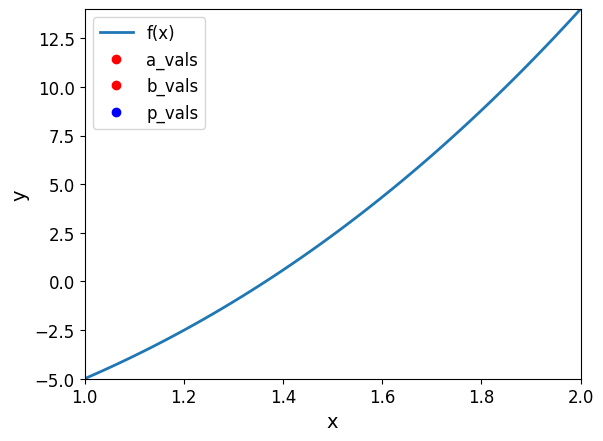

In [6]:
from matplotlib.animation import FuncAnimation # type: ignore

fig, ax = plt.subplots()
x = np.linspace(1, 2, 100)
y = f(x)
line, = ax.plot(x, y, label='f(x)')
point_a, = ax.plot([], [], 'ro', label='a_vals')  # Point for a_vals
point_b, = ax.plot([], [], 'ro', label='b_vals')  # Point for b_vals
point_p, = ax.plot([], [], 'bo', label='p_vals')  # Point for p_vals

ax.set_xlim(1, 2)
ax.set_ylim(f(1), f(2))

def update(i):
    ax.set_title(f"Iteration {i+1}")
    point_a.set_data([a_vals[i]], [0])
    point_b.set_data([b_vals[i]], [0])
    point_p.set_data([p_vals[i]], [f(p_vals[i])])
    
    return point_a, point_b, point_p

ani = FuncAnimation(fig, update, frames=range(n_max), repeat=False)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Conservative Nature of the Error Estimator
The number of iterations the theorem predicts that to get 
$$
|p_n -p|< {\rm TOL},
$$
it is sufficient to take $n$ large enough such that
$$
\frac{b-a}{2^n} < {\rm TOL}
$$

will be needed to satisfy a particular absolute error is often much higher than needed.

Suppose, for the above problem, we want an absolute error $<10^{-3}$.  

In [7]:
p_exact = 1.3652300134141  # found elsewhere
a = 1
b = 2
TOL = 10**3

n_max = ceil(log2(TOL * (b - a)))
print(f'n_max = {n_max}')

a_vals = np.zeros(n_max)
b_vals = np.zeros(n_max)
p_vals = np.zeros(n_max)
p = 0
for i in range(n_max):
    a_vals[i] = a
    b_vals[i] = b
    p = 0.5 *  (a + b)
    p_vals[i] = p
    # print(f" {i+1:3d}: a = {a:.8f}, b = {b:.8f}, p = {p:.8f}, f(p) = {f(p):g}")
    if f(a) * f(p) <= 0:
        b = p
    else:
        a = p

print(f"abs(p - p_exact) = {np.abs(p - p_exact)}")

n_max = 10
abs(p - p_exact) = 0.0009722009140999965


In [8]:
print(f"{n_max}-element Vector (Float64):")
for elem in p_vals:
    print(np.abs(elem - p_exact))

10-element Vector (Float64):
0.1347699865859
0.1152300134141
0.009769986585900003
0.0527300134141
0.021480013414099997
0.0058550134140999965
0.0019574865859000035
0.0019487634140999965
4.361585900003462e-06
0.0009722009140999965
